# VIT Unimodal 

Configs:
1. `UNIMODAL_FEATURE_EXTRACTOR : "VIT"`
1. `LEARNING_RATE: 0.001`

In [1]:
# change present working directory to project directory
import os
os.chdir("../")

In [2]:
os.getcwd()

'/Users/shaileshmahto/Documents/Data_Science_Projects/Hate-Video-Classification/Hate_Video_Classification/CSE676-Deep-Learning-Final-Project'

In [3]:
import warnings
from training.test_model import test_model
from models.vision_models import LSTM
from data_preprocessing.custom_datasets import Dataset_3DCNN
from utils.utils import load_config, fix_the_random
from training.evaluation import get_metric_by_epoch, plot_all_metrics, save_results
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [4]:
warnings.filterwarnings('ignore')

model_name = "VIT_Unimodal"

config = load_config('configs/configs.yaml')
fix_the_random(2021)

# load k-fold indexes
with open(config["PICKLE_FOLDER"]+'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)

model_cls = LSTM

dataset_cls = Dataset_3DCNN

## Model Training

In [5]:
performance_by_epoch, best_mean_metrics, best_std_metrics = test_model(
                                                                model_cls=model_cls,
                                                                dataset_cls=dataset_cls,
                                                                epochs=config["EPOCHS"],
                                                                optimizer_name="Adam",
                                                                allDataAnnotation=allDataAnnotation
                                                            )

100%|██████████| 5/5 [03:58<00:00, 47.60s/it]


In [6]:
with open(config["PICKLE_FOLDER"] + f"{model_name}_scores.p", "wb") as f:
    pickle.dump((performance_by_epoch, best_mean_metrics, best_std_metrics), f)

## Model Evaluation

In [5]:
with open(config["PICKLE_FOLDER"] + f"{model_name}_scores.p", "rb") as f:
    performance_by_epoch, best_mean_metrics, best_std_metrics = pickle.load(f)

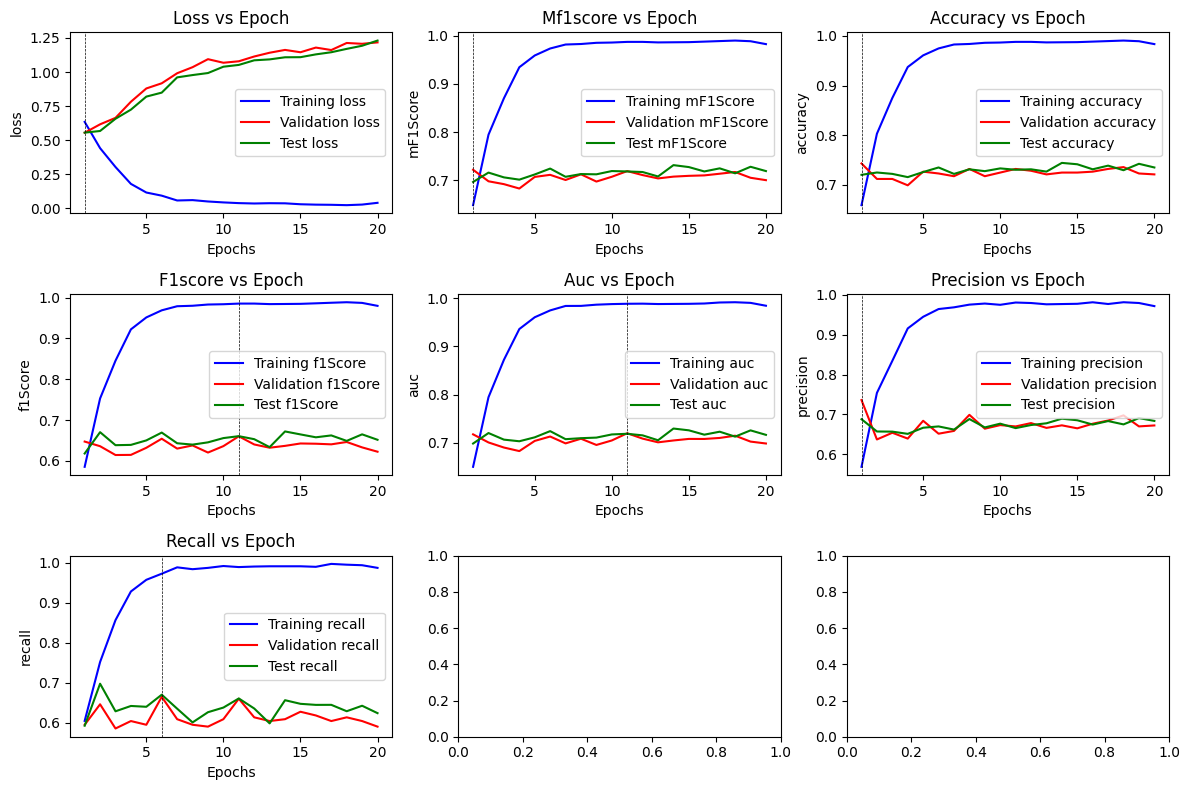

In [6]:
plot_all_metrics(performance_by_epoch)

In [7]:
name_of_entry = "VIT+LSTM+FCL"
save_results(performance_by_epoch, name_of_entry)

Results saved successfully!
